# Deep Learning with a Small Data Set

## Objective

The original casting data set has 

Based on [this article](https://machinelearningmastery.com/model-averaging-ensemble-for-deep-learning-neural-networks/).

In [18]:
import pathlib
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report

import casting_defects_sample_data
import casting_defects_plots
import casting_defects_models

In [19]:
SAMPLE_DATA = False
TRAIN_NEURAL_NETWORK = True
BATCH_SIZE = 64
NO_EPOCHS = 10
NO_MODELS = 40

plt.style.use('ggplot')

In [20]:
# Setup output directory if it does not exist.
output_dir = pathlib.Path().cwd() / 'output'
try:
    output_dir.mkdir()
except FileExistsError:
    pass

In [21]:
sample_dir = pathlib.Path().cwd() / 'sample_data/'

if SAMPLE_DATA:
    # Take a sample of the original data.
    orig_dir = pathlib.Path.cwd().parent  / 'input'
    casting_defects_sample_data.sample_data(
        orig_dir,
        pathlib.Path().cwd() / 'sample_data/',
        no_train=50, no_test=125)

In [22]:
# Instantiate image generators on sampled data.
input_dir = sample_dir
data_sets = ('train', 'test')
train_dir, test_dir = [next(input_dir.rglob(ds)) for ds in data_sets]

trainval_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.02,
    horizontal_flip=True,
    vertical_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1. / 255
)

# Create neural network architecture.
model = Sequential([
    Conv2D(32, kernel_size=3, input_shape=(300, 300, 1), activation='relu'),
    MaxPool2D(4),
    Conv2D(64, kernel_size=3, input_shape=(300, 300, 1), activation='relu'),
    MaxPool2D(4),
    Conv2D(32, kernel_size=3, input_shape=(300, 300, 1), activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [23]:
# Instantiate a custom CastingDefectsModels class.
# Provides methods for training , evaluating and predicting on and 
# ensemble of models. 
cdf = casting_defects_models.CastingDefectModels(
    train_dir=train_dir,
    test_dir=test_dir,
    output_dir=output_dir / 'simple_cnn_with_image_aug',
    trainval_datagen=trainval_datagen,
    test_datagen=test_datagen,
    model=model,
    no_epochs=NO_EPOCHS
)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


Found 50 images belonging to 1 classes.
Found 50 images belonging to 1 classes.


/home/nick/anaconda3/envs/kaggle-casting-defects/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/nick/anaconda3/envs/kaggle-casting-defects/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


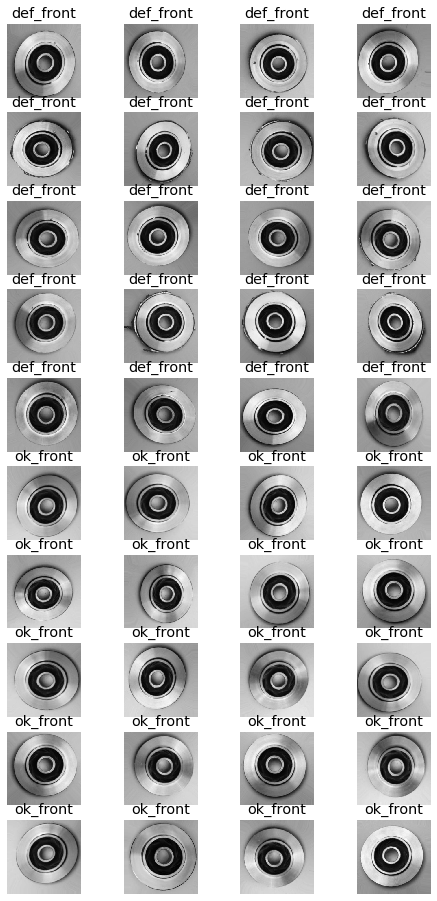

In [24]:
# Generate some examples of pre-processed images.
example_plot = cdf.generate_examples(nrows=5, ncols=4, figsize=[8, 16])

In [25]:
# Train models.
if TRAIN_NEURAL_NETWORK:
    cdf.train_models(no_models=NO_MODELS)
    

Training 0 out of 40 models...
Training 1 out of 40 models...
Training 2 out of 40 models...
Training 3 out of 40 models...
Training 4 out of 40 models...
Training 5 out of 40 models...
Training 6 out of 40 models...
Training 7 out of 40 models...
Training 8 out of 40 models...
Training 9 out of 40 models...
Training 10 out of 40 models...
Training 11 out of 40 models...
Training 12 out of 40 models...
Training 13 out of 40 models...
Training 14 out of 40 models...
Training 15 out of 40 models...
Training 16 out of 40 models...
Training 17 out of 40 models...
Training 18 out of 40 models...
Training 19 out of 40 models...
Training 20 out of 40 models...
Training 21 out of 40 models...
Training 22 out of 40 models...
Training 23 out of 40 models...
Training 24 out of 40 models...
Training 25 out of 40 models...
Training 26 out of 40 models...
Training 27 out of 40 models...
Training 28 out of 40 models...
Training 29 out of 40 models...
Training 30 out of 40 models...
Training 31 out of

/home/nick/anaconda3/envs/kaggle-casting-defects/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/nick/anaconda3/envs/kaggle-casting-defects/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [26]:
# Compute history.
history = cdf.gather_ensemble_history()   

/home/nick/anaconda3/envs/kaggle-casting-defects/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/nick/anaconda3/envs/kaggle-casting-defects/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


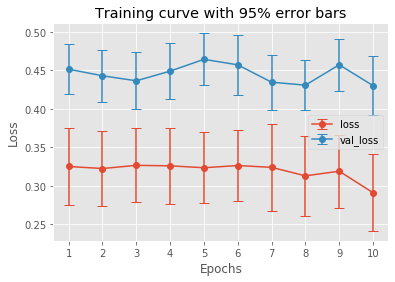

In [27]:
plot_ensemble_hist = cdf.plot_ensemble_history() 

In [28]:
pred_prob, raw_predictions = cdf.ensemble_predictions()

Predicting with model #0001: model_71da9894-7e9a-4dd2-b9c6-f5649d27b404.h5
Predicting with model #0002: model_e35cd4f2-51e3-4234-a359-63b17f5f1298.h5
Predicting with model #0003: model_173c1f4d-e14e-4f8d-b785-532e93d7e814.h5
Predicting with model #0004: model_69efcf35-c7fd-4ca0-a656-64331994b241.h5
Predicting with model #0005: model_99a6598a-9113-4693-a5d9-fe3961b2e65c.h5
Predicting with model #0006: model_75cf98b2-037a-4007-b541-376817c3502c.h5
Predicting with model #0007: model_47472b7d-40e4-4341-8da3-5e35075c0f4b.h5
Predicting with model #0008: model_be761002-d558-4da0-a12e-32335e562a6a.h5
Predicting with model #0009: model_77acfcb1-10f6-4e6d-84e3-9eb0e40a067d.h5
Predicting with model #0010: model_37da16d0-97f1-4942-a791-c74dbfe22a44.h5
Predicting with model #0011: model_b0fcb08b-c489-4fa0-8dc0-cd039f0f4b95.h5
Predicting with model #0012: model_5fae15ed-23b9-4186-8684-5ef7d289b5da.h5
Predicting with model #0013: model_5a294dac-90a1-4092-b4ac-2fb391c6beab.h5
Predicting with model #00

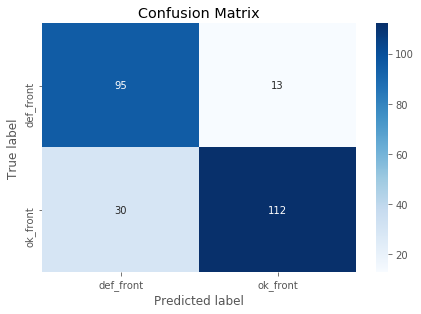

In [29]:
# Predicted class
pred_class = [elem > 0.5 for elem in pred_prob['mean']]

# True class.
true_class = cdf.test_generator.classes

# Get label/target encoding.
class_indices = [[k, v] for k, v in cdf.test_generator.class_indices.items()]
target_names, labels = list(zip(*class_indices))
cm = confusion_matrix(pred_class, true_class)

casting_defects_plots.plot_confusion_matrix(cm, labels=target_names)
 

In [30]:
print(classification_report(pred_class, true_class,
                            labels=labels, target_names=target_names))

              precision    recall  f1-score   support

   def_front       0.76      0.88      0.82       108
    ok_front       0.90      0.79      0.84       142

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.84      0.83      0.83       250



No handles with labels found to put in legend.


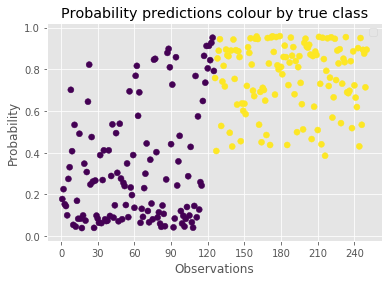

In [31]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()

mean_prob = pred_prob['mean']
std_err_prob = pred_prob['std_err']

ax.scatter(x=range(1, len(mean_prob) + 1),
           y=mean_prob,
           c=true_class)
ax.set_title('Probability predictions colour by true class')
ax.set_xlabel('Observations')
ax.set_ylabel('Probability')
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
